# Introduction to Quantum Computing based on IBM Q

Quantum computing is one approach to obtain answer that classical conventional computer cannot easily handle or intractable at all. Using the power of superposition and entanglement (will explain later) of quantum system, quantum algorithms have the potential to provide speed-up (exponential or quadratic) over classical algorithms. For now, the existing quantum devices are not identified as universal quantum computer, but have their own advantages over conventional computers. Utilizing the [IBM Q Experience](https://quantumexperience.ng.bluemix.net/qx/editor) , we are able to implement certain algorithm with limited number of qubits.

# 1. Background
This section will introduce some of the basic concept from quantum mechanics and then roam into the quantum computation.

## 1.1 Qubit

In general, any two-level quantum system can be treated as a qubit, with a clear definition of two quantum state $|0\rangle$ and $|1\rangle$. Similar to classical bits (eg. on/off, high voltage/low voltage as 0/1), there are lots of systems can realise such system, for example, the spin of atoms or electrons (up/down), or the occupation number of fermions in optical lattices (0/1). For now, there are several major directions to realise quantum computer like ultra-cold atom in optical lattices, trapped ions, photons.

We noted the states $|0\rangle$ and $|1\rangle$ as:

\begin{equation}
| 0 \rangle = \begin{pmatrix}
 1 \\ 0
\end{pmatrix}
\qquad
| 1 \rangle = \begin{pmatrix}
 0 \\ 1
\end{pmatrix}
\end{equation}

$| i \rangle$ is called "ket", and $\langle i | = | i \rangle^\dagger $ is called "bra". The states form an orthonormal basis of the Hilbert space $\langle i | j \rangle = \delta_{i,j}$

## 1.2 Pauli matrices
The Pauli matrices, defined as below, is a set of unitary ($U  U^\dagger = U^\dagger U = \mathcal{I}$) and Hermitian ($U^\dagger = U$) $2\times2$ complex matrices.

\begin{equation}
\sigma_x = 
\begin{pmatrix}
0 & 1 \\1 & 0
\end{pmatrix}
\qquad
\sigma_y = \begin{pmatrix}
0 & -i \\i & 0
\end{pmatrix}
\qquad\sigma_z = \begin{pmatrix}
1 & 0 \\0 & -1
\end{pmatrix}
\end{equation}

It is straight-forward that $|0\rangle$ and  $|1\rangle$ are the eigenstates of Pauli-Z matrix $\sigma_z$, i.e. $\sigma_z |0\rangle = |0\rangle$ and $\sigma_z |1\rangle = - |1\rangle$

The expectation value of an operator in specific state can be calculated as $\langle i | O | i \rangle$. An Hermitian operator has a real expectation value, $(\langle i | O | i \rangle)^* = \langle i | O^\dagger | i \rangle = \langle i | O | i \rangle$, and we call it an observable.

## 1.3 Superposition of quantum states
One quantum state can be written as the superposition of other quantum states with complex coefficients. The interpretation is to represent this state in another orthonormal space.

\begin{equation}
|\psi\rangle = \sum_i \alpha_i |\phi_i \rangle
\end{equation}
with
$\sum_i |\alpha_i|^2 =1$. $|\alpha_i|^2$ is the probability that the system is in the particular state $|\phi_i \rangle$.

Here I would introduce another important set of states which is the superposition of $|0\rangle$ and $|1\rangle$,

\begin{equation}
| + \rangle = \frac{1}{\sqrt{2}} \left( |0\rangle + |1\rangle \right)
\qquad
| - \rangle = \frac{1}{\sqrt{2}} \left( |0\rangle - |1\rangle \right)
\end{equation}

which are the eigenstates of Pauli-X matrix

## 1.4 Bloch sphere
The bloch sphere is one way to visualise the state of one qubit. A general state of one qubit can be written as,

\begin{equation}
| \psi \rangle = \cos(\theta/2) | 0 \rangle + \sin(\theta/2) e^{i \phi} | 1 \rangle
\end{equation}

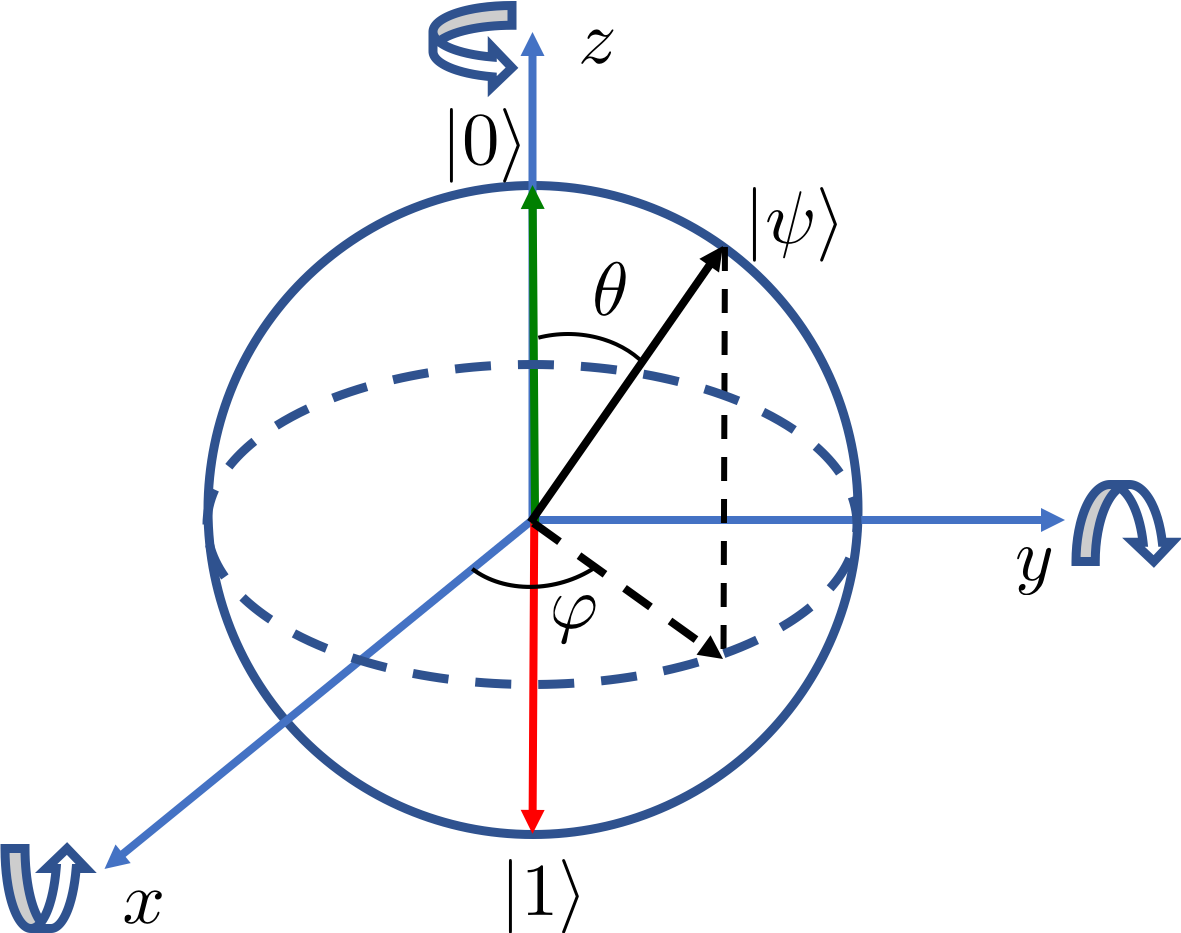

In [2]:
from IPython.display import Image
Image("blochsphere.png",width=500)

and the $|+\rangle$ and $| - \rangle$ states are sit on X-axis.

## 1.5 Entanglement
Entanglement is a quantum feature of a system of multiple qubits. A entangled state cannot be separated, which means the system cannot be expressed as two independent subsystem.
\begin{equation}
| \psi \rangle \neq | \psi_A \rangle \otimes | \psi_B \rangle
\end{equation}

One example of entangled states is a Bell state:
\begin{equation}
| \psi \rangle = \frac{1}{\sqrt{2}} \Big( | 0_A 0_B \rangle + | 1_A 1_B \rangle \Big)
\end{equation}

### 1.5.1 Density operator and von Neumann entropy
The density operator is useful to describe a statistical system in general. It has the definition as
\begin{equation}
\rho = \sum_i^n p_i | \psi_i \rangle \langle \psi_i |
\end{equation}

where $n \ge 1$, and $p_i$ is the probability of being in the state of $| \psi_i \rangle$. When $n=1$, the system is consider a pure state, or a mixed state otherwise. The trace of a density matrix is always one $tr(\rho)=1$, and a pure state also satisfies the condition that $\rho = \rho^2$.

The von Neumann entropy is defined as,
\begin{equation}
S_{vN}(\rho) = - tr(\rho \ln \rho)
\end{equation}

and it is easy to prove that the entropy of a pure state is zero.

The entropy of a subsystem is also related to measure entanglement to the rest of the system. To obtain the density matrix of a subsystem, we can "trace over" the rest of the system (sometime called environment). Consider a  system $\rho$, consists two subsystem A and B.

\begin{align}
\rho_A &= tr_B (\rho) \\
&= \sum_j^{dim(B)} \langle \phi_j | \rho | \phi_j \rangle
\end{align}

> HW: Prove a non-entangled state, in the form of $| \psi \rangle = | \psi_A \rangle \otimes | \psi_B \rangle$, has a density operator of the subsystem A as $\rho_A = | \psi_A \rangle \langle \psi_A |$, and the entropy is zero.

For an entangled state like a Bell state, $| \psi \rangle = \frac{1}{\sqrt{2}} \Big( | 0_A 0_B \rangle + | 1_A 1_B \rangle \Big)$, the density operator of system is:

\begin{align}
\rho &= | \psi \rangle \langle \psi | \\
&= \frac{1}{2} \left( | 0_A 0_B \rangle \langle 0_A 0_B| +| 0_A 0_B \rangle \langle 1_A 1_B| +| 1_A 1_B \rangle \langle 0_A 0_B| +| 1_A 1_B \rangle \langle 1_A 1_B| \right) \\
\rho_A &= \langle 0_B | \rho | 0_B \rangle + \langle 1_B | \rho | 1_B \rangle \\
&= \frac{1}{2} \left( | 0_A \rangle \langle 0_A | +  | 1_A \rangle \langle 1_A | \right)
\end{align}

thus, the von Neumann entropy is $S_{vN}(\rho_A) = - 1/2 \ln (1/2) - 1/2 \ln (1/2) = ln 2$. 

## 1.6 Quantum gates
### 1.6.1  Single-qubit gates
A unitary matrix acts on one qubit is called single-qubit operation, or single-qubit gate. It is considered a rotation of a vector on Bloch sphere, transfer the state vector to a new position. For example, the Hadamard gate, expressed as below, transfer between $| 0 \rangle \leftrightarrow | + \rangle$, and $| 1 \rangle \leftrightarrow | - \rangle$

\begin{equation}
H = \frac{1}{\sqrt{2}}\begin{pmatrix}
1 & 1 \\ 1 & -1
\end{pmatrix}
\end{equation}

which can be consider as a rotation with respect to $45^\circ$ axis on X-Z plane. 

Applying a gate that is unitary and Hermitian twice in a row will always gives you the identity matrix, and this feature can be used to simplify the circuit to prevent error of implementation.

### 1.6.2 Two-qubit gates
The operation acts on two qubits are always commonly used in quantum circuits. Utilizing two-qubit gates and single-qubit gates, an arbitrary quantum operation on multiple qubits can be approximated to an arbitrary accuracy, and those sets of gates are considered universal. One type of two-qubit gates plays an important role, controlled gate. A controlled gate, using one qubit as the control qubit and determine an operation on the target state. The operation will apply to the target state only if the control qubit is in $| 1 \rangle$ 
\begin{equation}
^cU  | 0 a \rangle = | 0 a \rangle \qquad ^cU  | 1 a \rangle = | 1 \rangle U | a \rangle
\end{equation}

I will introduce one important two-qubit gate, controlled-Not gate (CNOT).
\begin{equation}
\rm{CNOT}  | 0 a \rangle = | 0 a \rangle \qquad \rm{CNOT}  | 1 a \rangle = | 1 \bar{a} \rangle
\end{equation}

>HW: Try to prepare a Bell state mentioned above on two qubit, using CNOT. What about a quantum operation that swap the state of two qubit?

## 1.7 Quantum circuits
Quantum circuits represent a set of sequential quantum gates on qubits to perform quantum computation. 

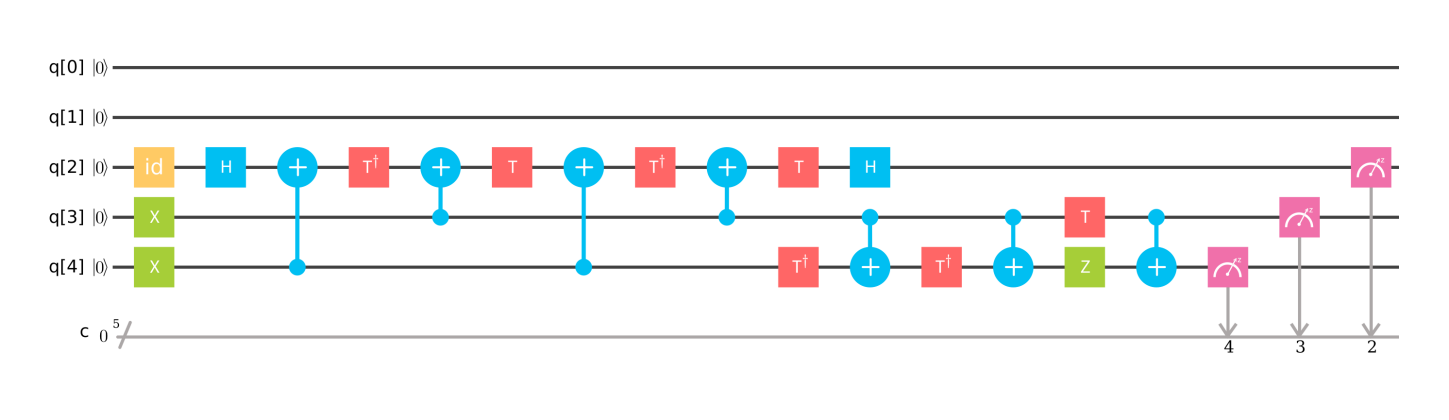

In [3]:
Image("qAdder.png")

Here is an example from [IBM Q Experience](https://quantumexperience.ng.bluemix.net/qx/editor), performing 1+1 = 10.

## 1.8 IBM Q Experience
The IBM Q Experiece is open to public where people can build the quantum circuit like lego. The quantum device as a bowtie architecture with 5 qubits. It is not a fully connected device which means the controlled gate can be implemented within some limitation. Nevertheless, it is a nice playground to start. IBM also provides a basic-level package [Qiskit Terra](https://qiskit.org/terra) to give instructions to the hardware. Using Qiskit, users are able to access their 16-qubit machine. Some of complex gates are included, for example Toffoli(Controlled-Controlled-Not) gate.

## 2. Designing a quantum circuit
Designing a quantum circuit is a hard problem for large system or complex problems. One way to realize simple algorithm is to study the decomposition of the target unitary matrix. When the system size is small, i.e. the dimension of the target unitary matrix is small, it is possible to decompose the matrix. In some other situations, the process of quantum algorithm can be implemented in the sequence of applying quantum gates on subsystems. 

## 2.1 Quantum half-adder algorithm
Mentioned above, the quantum half-adder is a good example to start with due to its complexity. The input/output chart of such an adder can be expressed as: 

|Input bit 1|Input bit 2|Output bit 1|Output bit 2|
|-----------|-----------|------------|------------|
|0          |0          |0           |0           |
|0          |1          |0           |1           |
|1          |0          |0           |1           |
|1          |1          |1           |0           |

1. The output bit 1 only flip from 0 to 1 when input bit 1 and input bit 2 are both 1. For the rest situation, it remains 0.
2. The output bit 2 is same as input bit 2 if input bit 1 is 0, and flips if input bit 1 is 1.

From these two rules, we are able to design a circuit.
1. The output bit 1 can be represented as the target qubit with a controlled-controlled-not gate with input bit 1 and input bit 2 are the control qubit.
2. The output bit 2 can be represented as the AND gate from input bit 1 and input bit 2, realized by a controlled-not gate.
The circuit is then:

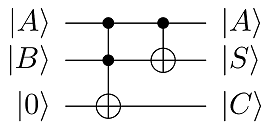

In [4]:
from IPython.display import Image
Image("quantum_half_adder.png")

The next step is to build such circuit using the gates that IBM Q hardware provided. Unfortunately, the Toffoli gate is not given, thus we have to build one. However, there is some resource ([IBM Q tutorial of basic gates](https://quantumexperience.ng.bluemix.net/proxy/tutorial/full-user-guide/004-Quantum_Algorithms/061-Basic_Circuit_Identities_and_Larger_Circuits.html)) provides the architecture of implementation of advanced gates with universal gates. Finally, (one version of)the quantum circuit of quantum half-adder is

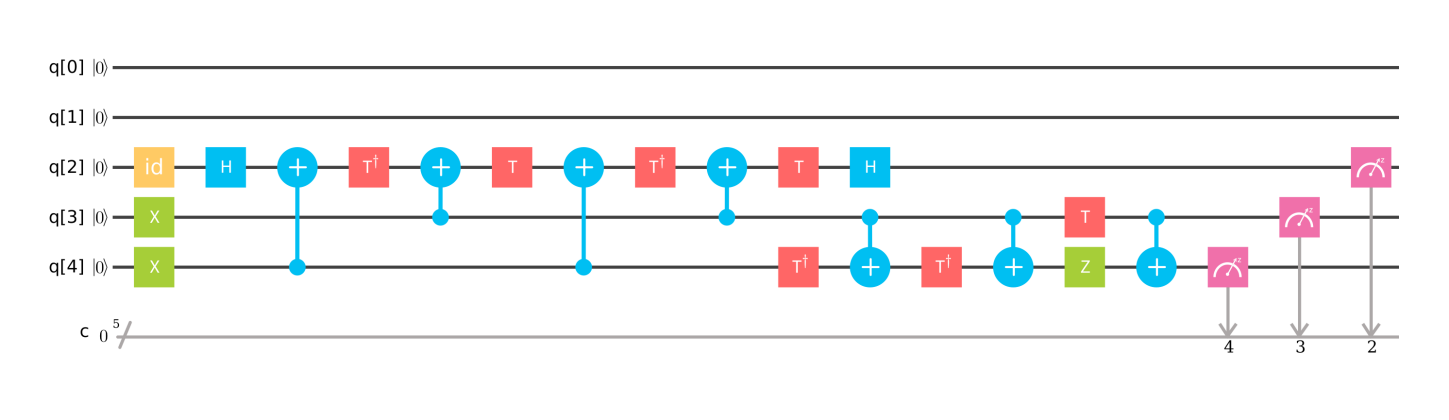

In [5]:
Image("qAdder.png")

The first time slot(step) is to prepare the state $|A\rangle \to q[3]$ and $|B\rangle \to q[4]$ to perform $A+B$. The next 13 steps, including the first step on $q[2]$ is to perform a Toffoli gate, followed by a CNOT gate. The $q[2]$ is the carry bit and the $q[4]$ is the sum.

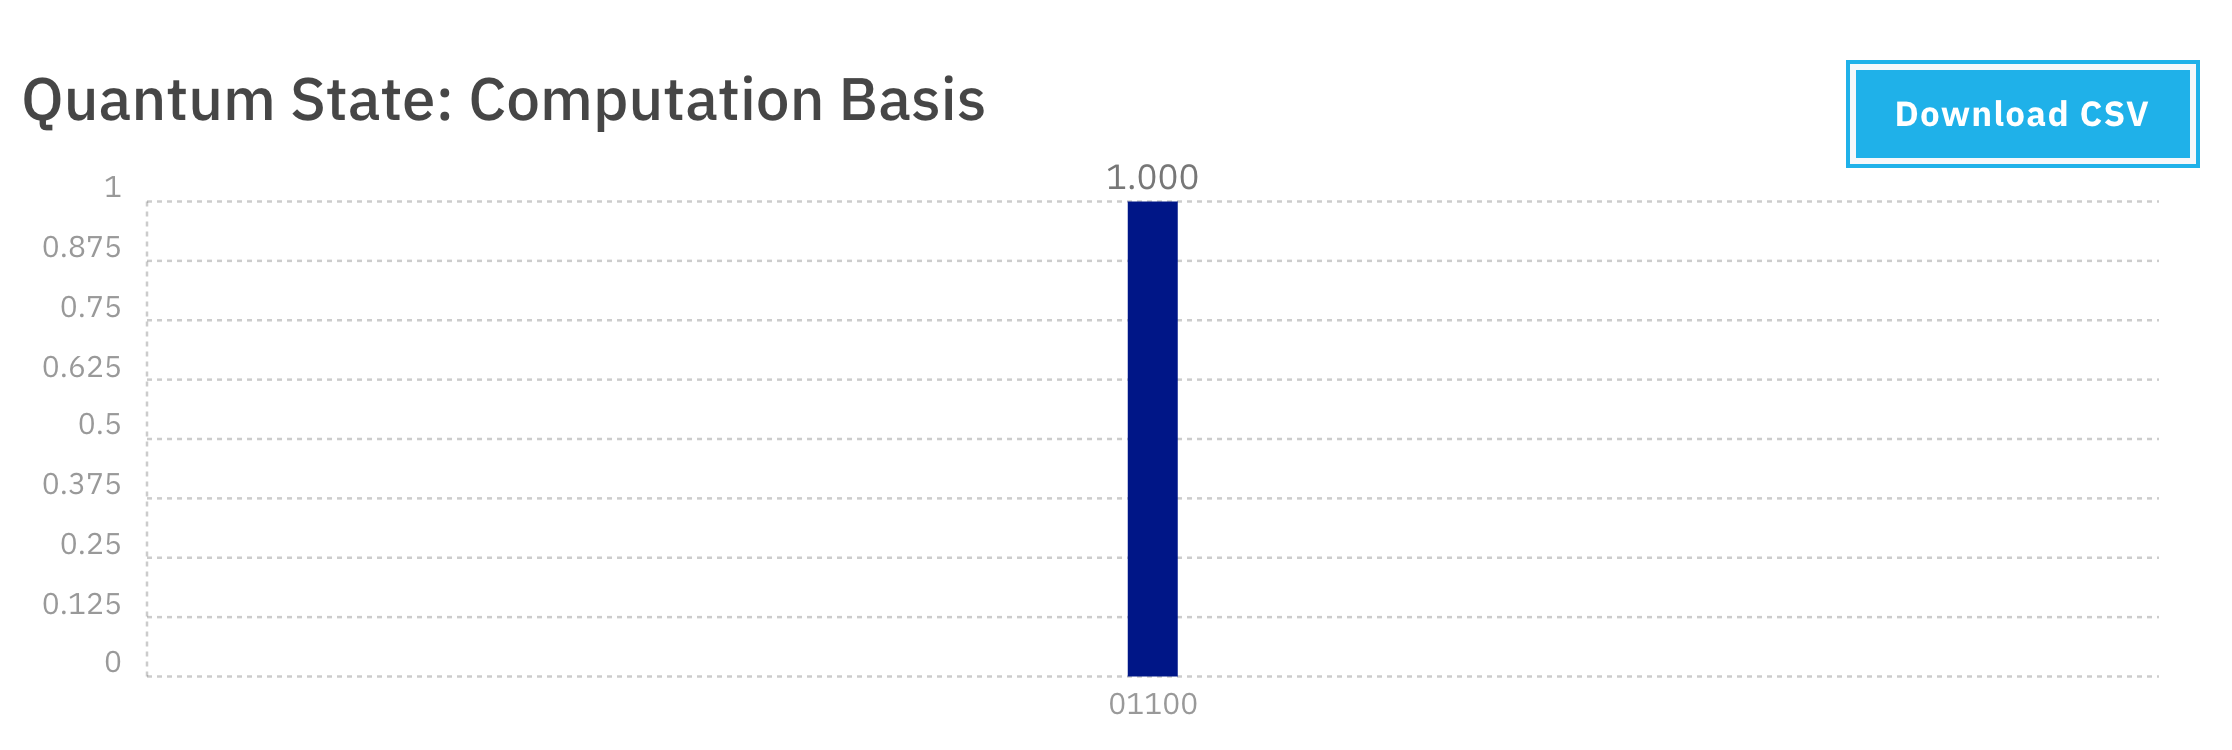

In [6]:
Image("qAdder_sim.png")

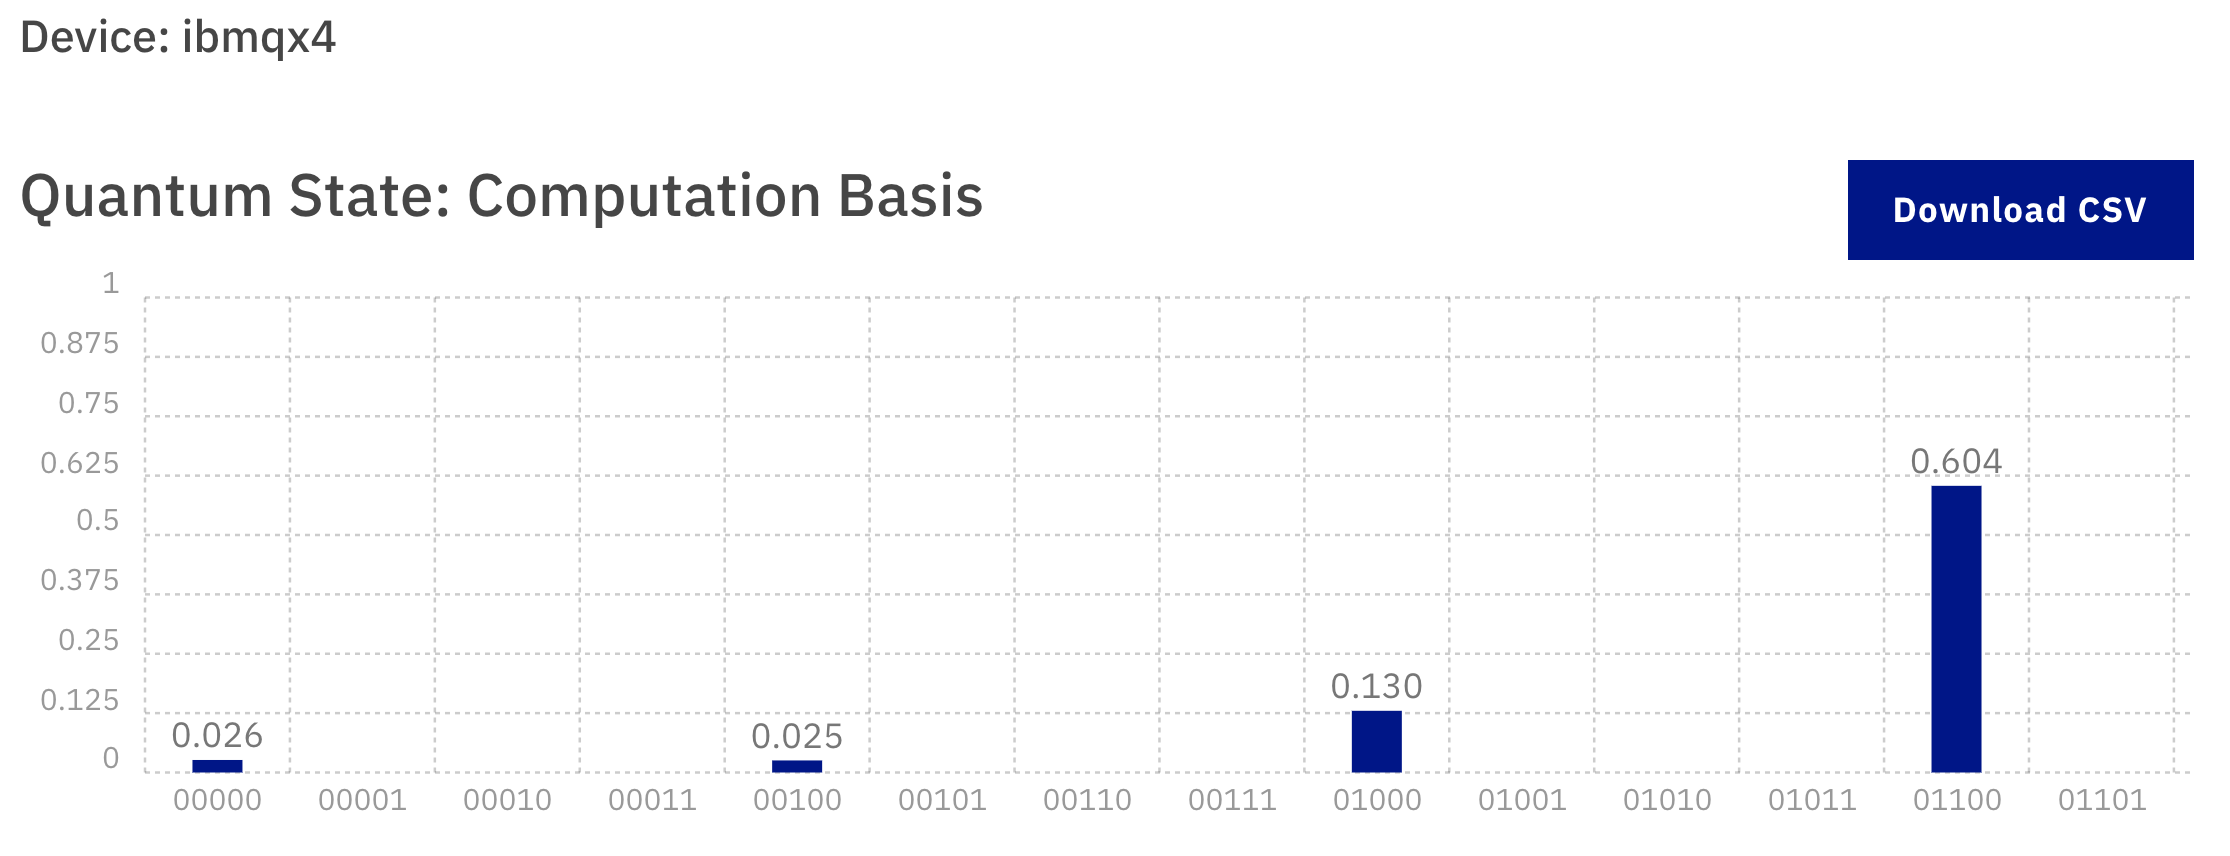

In [7]:
Image("qAdder_result.png")

The probability of success (fidelity) is slightly more than 60% with 1024 executions.

## 2.2 Grover's search algorithm

The algorithm is first proposed [Gover1996](https://arxiv.org/abs/quant-ph/9605043) for the search of certain element in an unstructured data base. Given a database with $N$ entries, the algorithm requires only $\mathcal{O}(\sqrt{N})$ operations instead of $\mathcal{O}(N)$ operations of classical algorithms. It is proved optimal later [Bennett1997](https://arxiv.org/abs/quant-ph/9701001) on a universial quantum computer. 

### 2.2.1 Grover's algorithm
The core of the algorithm is an oracle (blackbox) to implement such equation, given $x^*$ is the target entry in the database in binary form,

\begin{align}
f(x) = \begin{cases} 1, & \mbox{if } x = x^* \\ 0, & \mbox{if } x \neq x^* \end{cases} \end{align}

where $x$ is arbitary entry in database.

In addition, the oracle $\hat O$ performs the operation on $n+1$ qubits:

\begin{align}
\hat O |x\rangle |q\rangle = |x\rangle | f(x) \oplus q\rangle
\end{align}

where $q$ is an ancillary qubit, and $n$ is the total number digit to represent binary form of total $N$ elements in database. If $x=x^*$ (the oracle operates on target state), and $| q \rangle = |-\rangle = \frac{1}{\sqrt{2}} ( |0\rangle - |1\rangle ) $:

\begin{align}
\hat O (| x^*\rangle |-\rangle) &= | x^*\rangle \frac{1}{\sqrt{2}} \left( |f(x^*) \oplus 0\rangle - |f(x^*) \oplus 1\rangle \right) \\
&= | x^*\rangle \frac{1}{\sqrt{2}} \left( |1 \oplus 0\rangle - |1 \oplus 1\rangle \right) \\
&= | x^*\rangle \frac{1}{\sqrt{2}} \left( |1 \rangle - |0\rangle \right) \\
&= -| x^*\rangle |-\rangle
\end{align}

Followed by a mirroring operation $(2|\psi \rangle \langle \psi | - \mathcal{1}_N)\otimes \mathcal{1}$, where $| \psi \rangle = | + \rangle^{\otimes n}$ is an even superposition of all the $N$ states, and $\mathcal{1}_N$ is the identity matrix of the dimension of $N$. For an arbitary state $\sum_i a_i |i\rangle$,

\begin{align}
(2|\psi \rangle \langle \psi | - \mathcal{1}_N ) \sum_i a_i |i\rangle = \sum_i \left(2 \langle a \rangle - a_i \right) |i\rangle
\end{align}

where $\langle a \rangle = \sum_i a_i / \sum_i 1$.

The Grover operator $\hat G$, acting on $n+1$ qubits, is then
\begin{align}
\hat G = \{(2|\psi \rangle \langle \psi | - \mathcal{1}_N)\otimes \mathcal{1}\} \hat O
\end{align}

Applying Grover operator is to flip the sign of the coefficient of the target state and then to make the coefficient more than average value of all coefficients. On the other hand, the rest coefficients are decreasing. 

The geometric interpretation unfolds as below.

From the initial state being in $| \psi \rangle$, this Grover operator performs rotation within a subspace spanned by $| \psi \rangle$ and the target state. Now consider the answer space with $M$ targets, and the rest of the Hilbert space represented as 
\begin{align}
| \alpha \rangle &\equiv \sum _{x^*}^a \frac{N-M}{N}| x^* \rangle  \quad \text{orthogonal space}\\
| \beta \rangle &\equiv \sum _{x}^r \frac{1}{M}|x \rangle \quad \text{answer space}
\end{align}
and then the initial state is 
\begin{align}
| \psi \rangle = \sqrt{\frac{N-M}{N} }| \alpha \rangle + \sqrt{\frac{M}{N}} | \beta \rangle
\end{align}
Then let $\cos \frac{\theta}{2} = \sqrt{ \frac{N-M}{N} } $, so that $| \psi \rangle = \cos(\theta/2) | \alpha \rangle + \sin(\theta/2) | \beta \rangle$. The oracle performs a reflection with respect to $| \alpha \rangle$, since $\hat O (a | \alpha \range + b | \beta \rangle) = a | \alpha \range - b | \beta \rangle$, followed by another reflection with respect to $| \psi \rangle$. Shown in the folloing figure, applying the Grover operator once, is to rotate the initial state to $| \beta \rangle$ with an angle of $\theta$.

\begin{align}
\hat G | \psi \rangle = \cos \frac{3 \theta}{2} | \alpha \rangle + \sin \frac{3 \theta }{2} | \beta \rangle
\end{align}

After repetition for $k$ times, the final state is then

\begin{align}
\hat G^k | \psi \rangle = \cos \left(\frac{2k+1 }{2}\theta \right) | \alpha \rangle + \sin \left( \frac{2k+1 }{2}\theta \right) | \beta \rangle
\end{align}

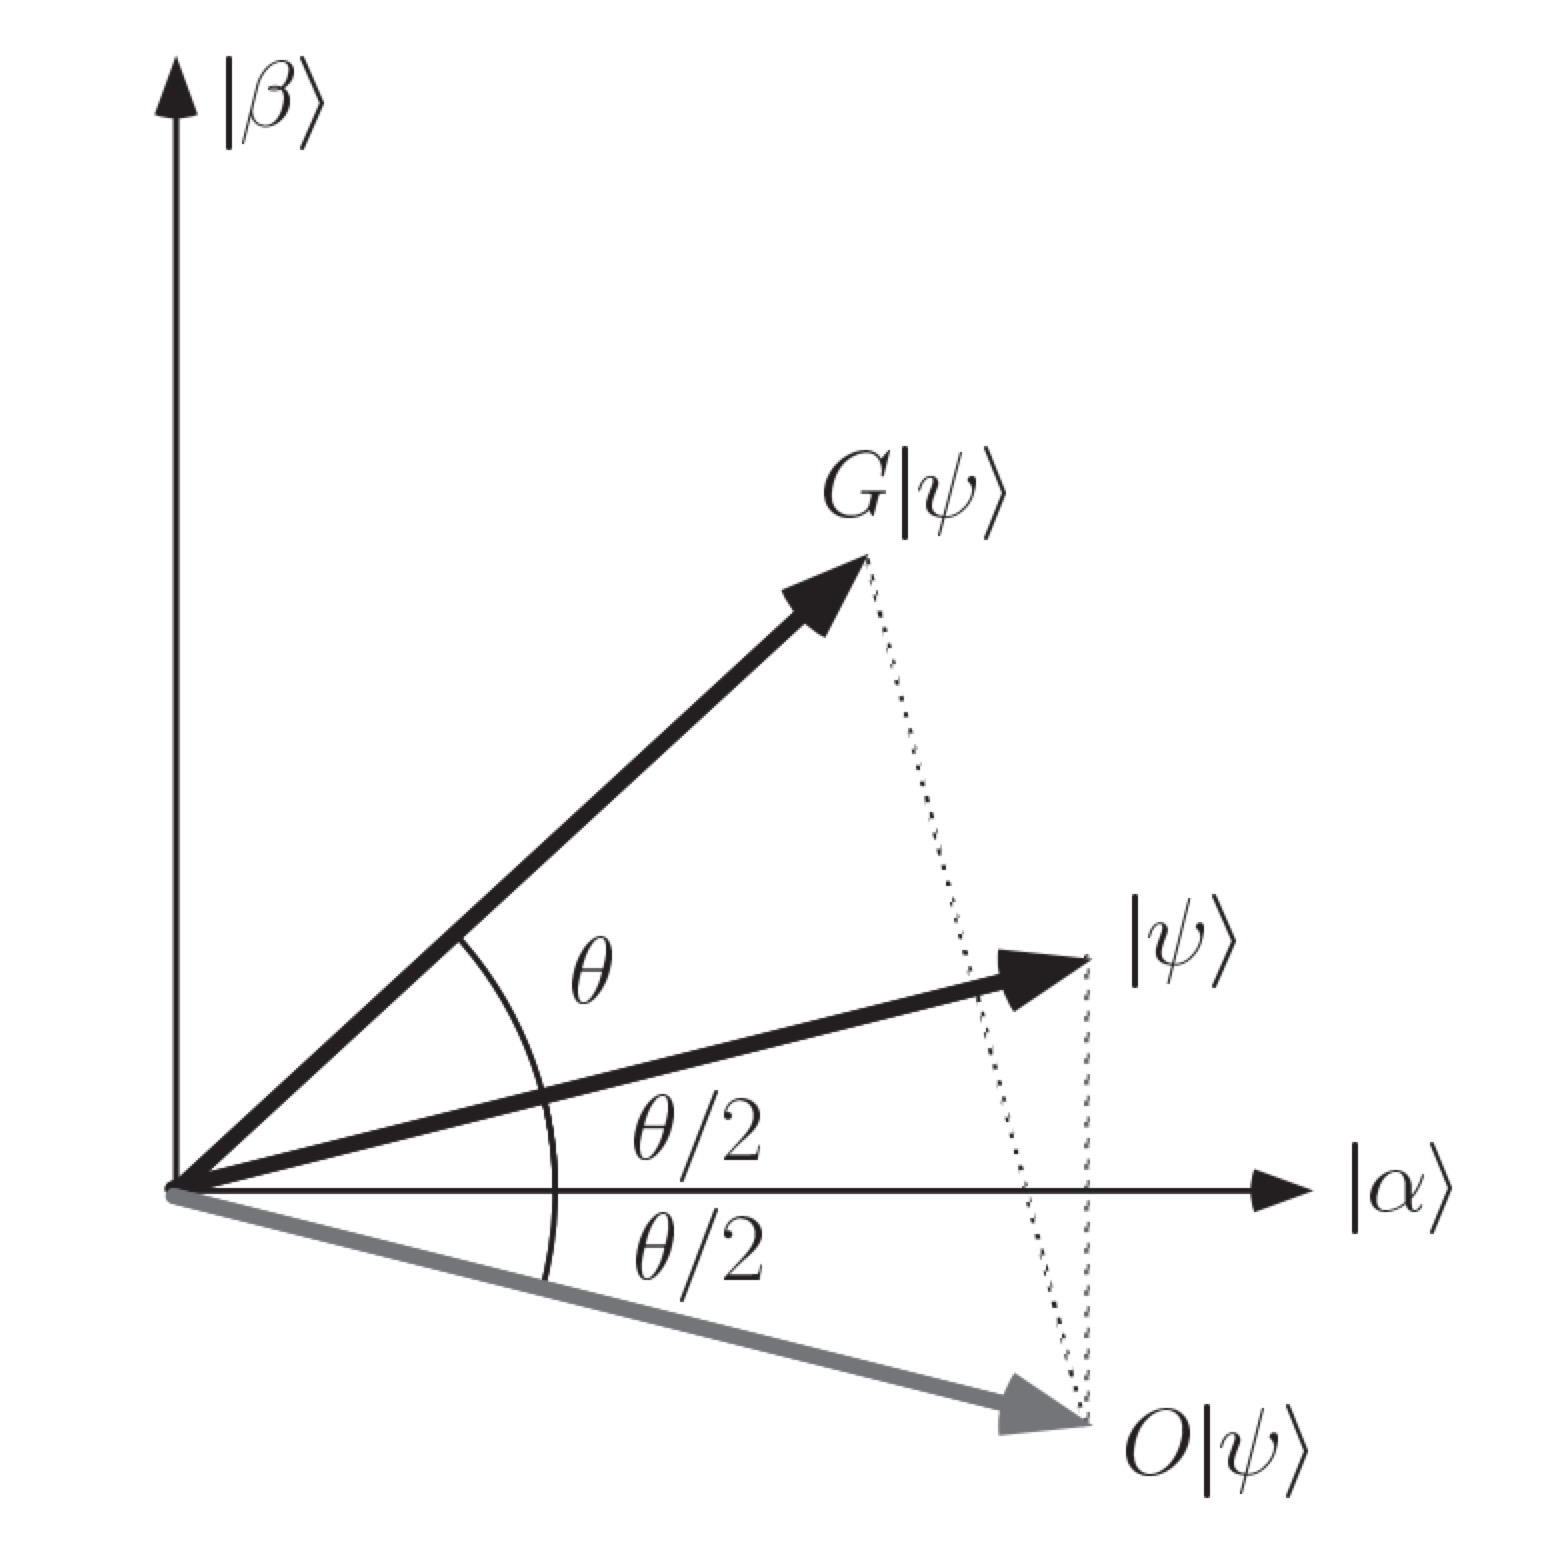

In [8]:
Image("grover_refl.jpg", width=350)
## From Nilsen and Chuang

This is to realize amplitude amplification of target state. In the case of $M=1$, and $N \gg 1$, $\sin \frac{\theta}{2} = \sqrt{1/N} \approx \theta/2$, so the rotating angle $\theta = \frac{2}{\sqrt{N}}$. To reach the target state, the number of applying Grover operator can be calculated as 
\begin{align}
\frac{2k+1}{2} \theta &= \frac{\pi}{2} \\
2k + 1 &= \frac{\pi}{\theta} \\
k & = \left(\frac{\pi}{\theta}-1 \right) /2 \\
&\approx \frac{\pi}{4} \sqrt{N} 
\end{align}

which means after applying $\hat G$ for the number of $\lceil \frac{\pi}{4} \sqrt{N} \rceil$ times, the amplitude of the target state is close to 1.

### 2.2.2 Classical simulation of Grover's algorithm
Here, we explicitly calculate the coefficients of the evolving state, to have a simulation of Grover's algorithm. 

[9.76562500e-04 8.76618922e-03 2.42238486e-02 4.71082506e-02
 7.70621756e-02 1.13618051e-01 1.56205248e-01 2.04158992e-01
 2.56730738e-01 3.13099854e-01 3.72386433e-01 4.33665027e-01
 4.95979092e-01 5.58355923e-01 6.19821833e-01 6.79417356e-01
 7.36212219e-01 7.89319871e-01 8.37911315e-01 8.81228051e-01
 9.18593915e-01 9.49425637e-01 9.73241941e-01 9.89671060e-01
 9.98456541e-01 9.99461245e-01 9.92669487e-01]


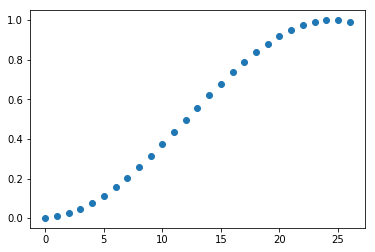

In [10]:
## Classical simulation of Grover's algorithm

import numpy as np
import math
import matplotlib.pyplot as plt
%matplotlib inline

n = 10  # num of qubits
N = 2**n  # num of elements
tar = 3 # target element <= N
# max_iter = 100 # total number of iterations
max_iter = math.ceil(np.pi/4*2**(n/2))

psi_0 = np.ones(N) * np.sqrt(1/N) # initial state

F = np.zeros(max_iter+1)
Res = np.zeros(max_iter+1)
F[0] = psi_0[tar-1]**2
Res[0] = psi_0[0]**2

psi = psi_0
for num_iter in range(max_iter):
    psi[tar-1] = -psi[tar-1]  #  flip he target coefficient after Oracle, others remains same
    aver_psi = np.mean(psi) 
    psi = 2*aver_psi - psi  # The whole vector goes through the mirroring
    F[num_iter+1] = psi[tar-1]**2
    Res[num_iter+1] = psi[0]**2
#     plt.plot(num_iter,psi[tar-1],'ro')

plt.plot(np.arange(max_iter+1),F,'o')
# plt.plot(np.arange(0,max_iter),Res,'o')
print(F)

### 2.2.3 Implementation of Grover's algorithm on IBM Q hardware

Given the IBM Q hardware has only 5 qubits and limited connection between qubits, it is still possible to realize Grover's algorithm.


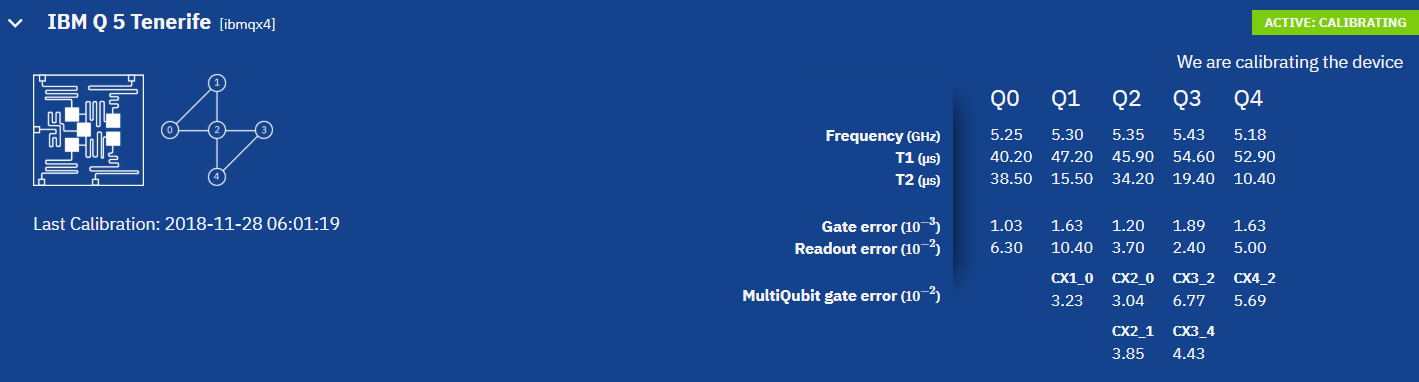

In [11]:
Image("topology.png")

 When $N=4$ and $M=1$, thus, performing a search of one element in a database of four, the oracle $\hat O$ is based on a Toffoli gate (ccx). If we want to search number $3$ in the set $\{0,1,2,3\}$, the oracle is simply a Toffoli gate.
>How about other elements?!

The reflection with respect to $| \psi \rangle$ can be constructed from a reflection with respect to $| 0 \rangle$. With the relation $H^{\otimes n} | 0 \rangle = | \psi \rangle$, 

\begin{align}
2 |\psi \rangle \langle \psi| - \mathcal{1}_N = H^{\otimes n} \left(2 | 0 \rangle \langle 0 | -  \mathcal{1}_N \right) H^{\otimes n}
\end{align}

The circuit is shown below

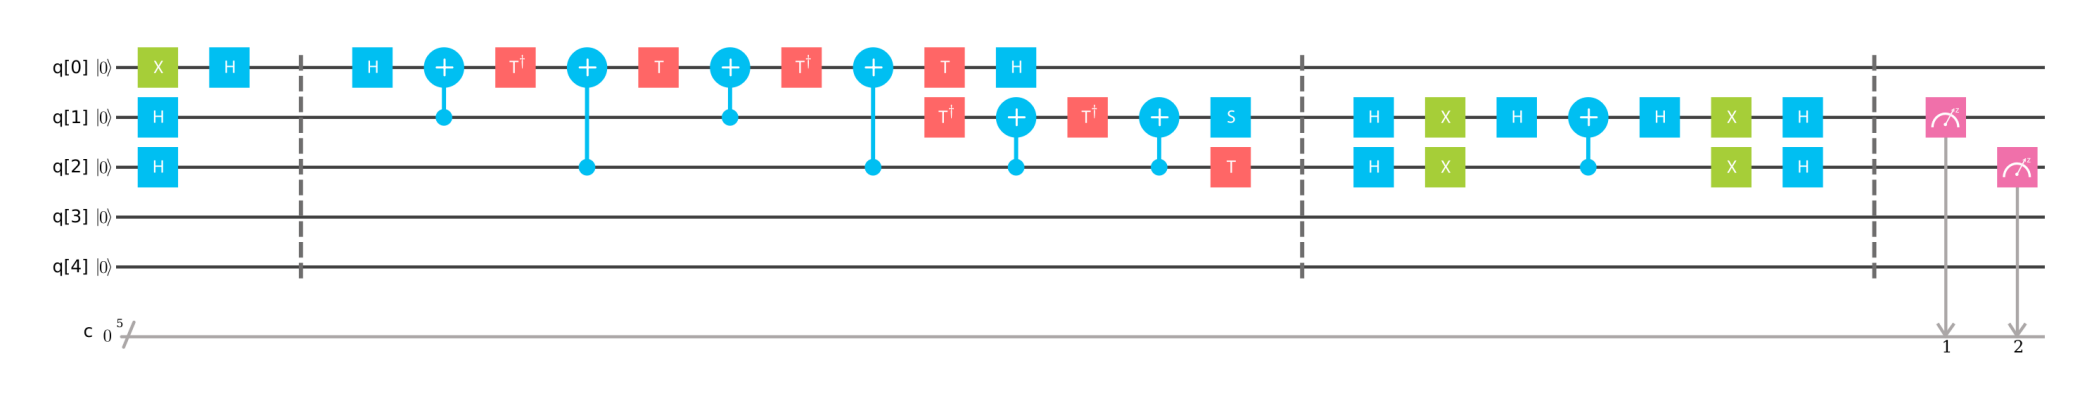

In [12]:
Image("grover_circuit.png")

with q[0] is the ancillary qubit and q[1] and q[2] are representing the database. Before the first barrier, it is to prepare the initial state $| \psi \rangle | - \rangle$, followed by a Toffoli gate as the oracle, and the reflection with respect to $| \psi \rangle$. The measurement outcome shall be the binary form of what we are searching for, number $3$.

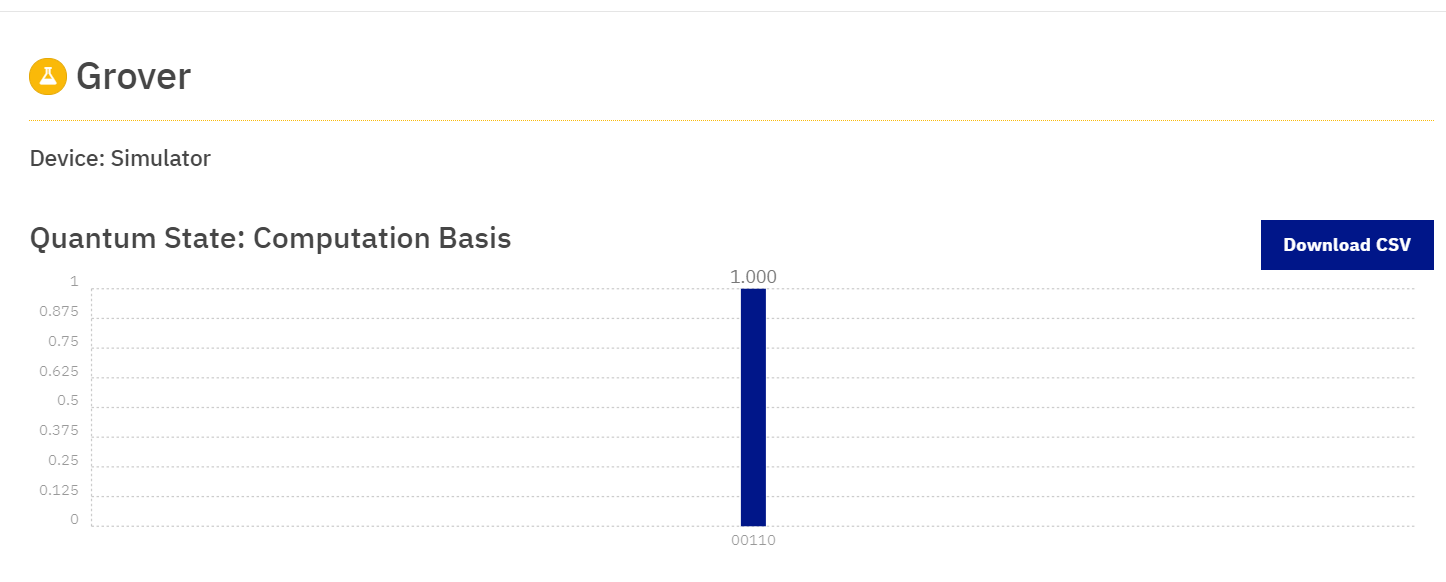

In [13]:
Image("grover_sim.png")

The performance on the hardware is 

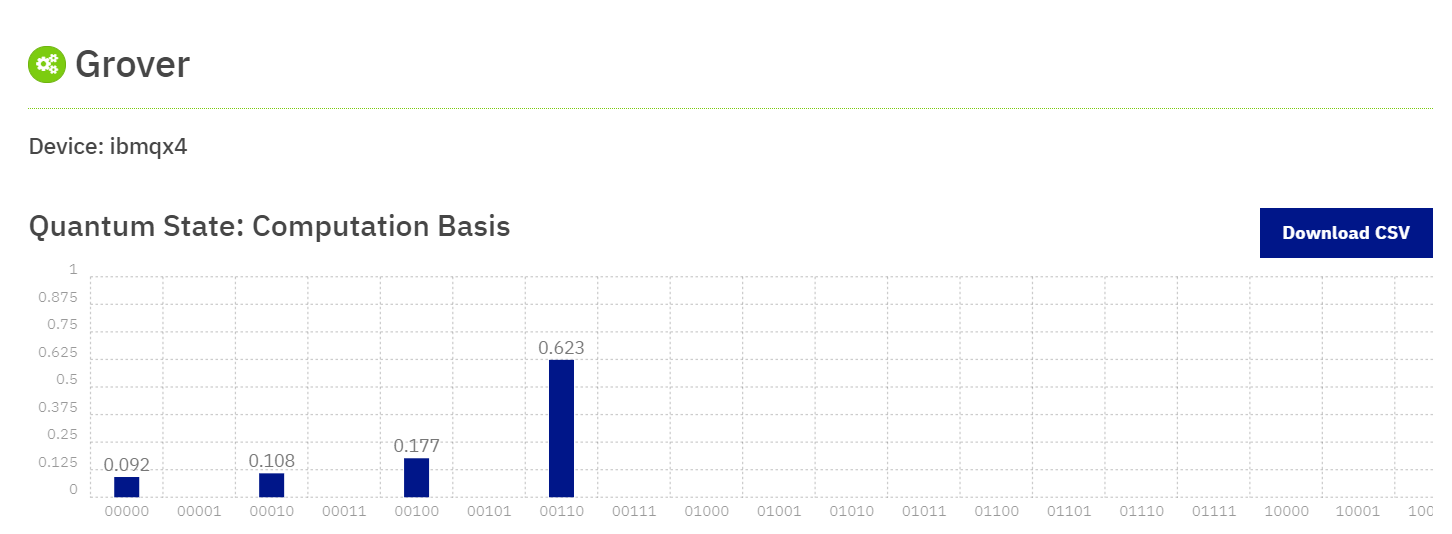

In [14]:
Image("grover_result.png")

The probability of output correct result (00110) is 62.3\%. This error includes the gate error, which means whether the gate is well performed, and the read-out error, which means the measurements are somehow failed.

## 3. Conclusion and Outlook
Here I went back for the basic concepts of quantum computing and quantum circuits. Briefly I introduced the system of IBM Q Experience and their web interface. Later, I gave two example of implementing algorithm on IBM Q hardware. It is not very ideal and many problems remain unsolved, like the identification of error resource and research for improvement of performance. 

The next Monday, I will introduce their programing package from where we can have access to there 16-qubit system.